## Shubham Tade : 
# Project: COVID-19 Disease image classification using CNN

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img , img_to_array , ImageDataGenerator
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense

In [3]:
train_path = r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Image Classification With CNN\Covid19-dataset\train"
test_path = r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Image Classification With CNN\Covid19-dataset\test"
validation_path = r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Image Classification With CNN\Covid19-dataset\validation"

In [4]:
img_width , img_height = 512 , 512

In [5]:
batch_size = 50

In [6]:
train_dataset = ImageDataGenerator(rescale=1.0/255,
                                  rotation_range=20,
                                   shear_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True                                 
                                   )


In [7]:
val_dataset = ImageDataGenerator(rescale=1.0/255)

In [8]:
test_dataset = ImageDataGenerator(rescale=1.0/255)

In [9]:
train_img = train_dataset.flow_from_directory( train_path ,target_size=(img_width,img_height) , batch_size=batch_size , class_mode='categorical')

Found 251 images belonging to 3 classes.


In [10]:
test_img = test_dataset.flow_from_directory(test_path , target_size=(img_width,img_height) , batch_size=batch_size , class_mode='categorical')

Found 31 images belonging to 3 classes.


In [11]:
val_img = val_dataset.flow_from_directory(validation_path , target_size=(img_width,img_height) , batch_size=batch_size , class_mode='categorical')

Found 35 images belonging to 3 classes.


In [12]:
train_img.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [13]:
classes = ['Covid' , 'Normal' , 'Viral Pneumonia']

In [14]:
model = Sequential([

    Conv2D(16,(3,3), activation='relu',input_shape=(img_width,img_height,3)),
    Conv2D(32,(3,3) , activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(70,activation='relu'),
    Dense(50,activation='relu'),
    Dense(30,activation='relu'),
    Dense(3,activation='softmax')


    
])

In [15]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [16]:
history1 = model.fit(train_img ,epochs=8 , validation_data=val_img)

Epoch 1/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 410s 81s/step - accuracy: 0.3614 - loss: 4.3153 - val_accuracy: 0.3429 - val_loss: 1.0540
Epoch 2/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 409s 69s/step - accuracy: 0.4307 - loss: 1.0372 - val_accuracy: 0.6286 - val_loss: 0.8963
Epoch 3/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 426s 84s/step - accuracy: 0.5590 - loss: 1.0883 - val_accuracy: 0.3429 - val_loss: 1.1062
Epoch 4/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 446s 72s/step - accuracy: 0.5009 - loss: 0.9815 - val_accuracy: 0.6571 - val_loss: 0.9442
Epoch 5/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 404s 65s/step - accuracy: 0.6858 - loss: 0.7945 - val_accuracy: 0.4857 - val_loss: 0.9815
Epoch 6/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 475s 75s/step - accuracy: 0.6283 - loss: 0.8136 - val_accuracy: 0.6857 - val_loss: 0.7177
Epoch 7/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 451s 73s/step - accuracy: 0.7310 - loss: 0.5928 - val_accuracy: 0.6857 - val_loss: 0.8653
Epoch 8/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 450s 72s/step - accuracy: 0.7820 - loss: 0.5349 - val_accuracy: 0.6000 - val_loss: 0.7149


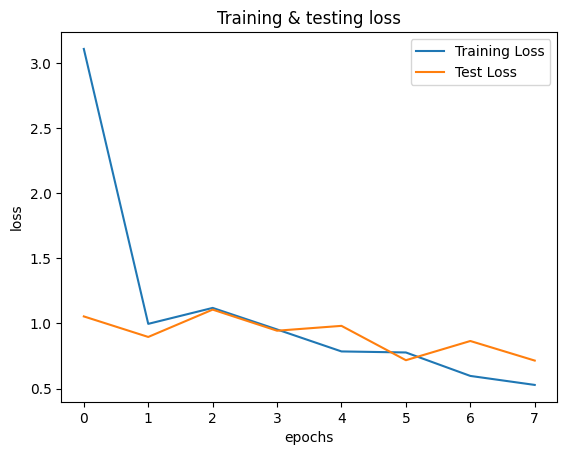

In [32]:
plt.plot(history1.history['loss'] , label='Training Loss')
plt.plot(history1.history['val_loss'] , label='Test Loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training & testing loss')
plt.show()


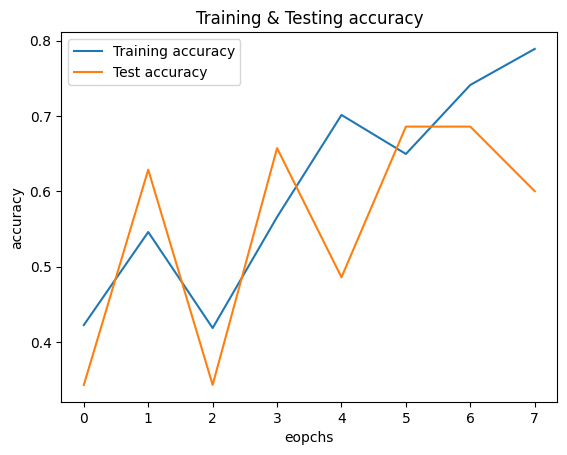

In [33]:
plt.plot(history1.history['accuracy'] , label='Training accuracy')
plt.plot(history1.history['val_accuracy'] , label = 'Test accuracy')
plt.legend()
plt.xlabel('eopchs')
plt.ylabel('accuracy')
plt.title('Training & Testing accuracy')
plt.show()

In [20]:
def predict(path):
    img = load_img(path , target_size = (512,512,3))
    img_arr = img_to_array(img)
    norm= img_arr/255.0
    flat = np.expand_dims(norm , axis=0)
    pred = model.predict(flat)[0]
    clas = classes[np.argmax(pred)]
    return clas

In [21]:
predict(r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Image Classification With CNN\Covid19-dataset\test\Covid\094.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


'Covid'

In [24]:
predict(r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Image Classification With CNN\Covid19-dataset\test\Covid\094.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


'Covid'

In [25]:
predict(r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Image Classification With CNN\Covid19-dataset\test\Normal\0116.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


'Normal'

In [26]:
predict(r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Image Classification With CNN\Covid19-dataset\test\Viral Pneumonia\0114.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


'Viral Pneumonia'

In [27]:
predict(r"C:\Users\Shubham Tade\Desktop\Projects\Ai project\Image Classification With CNN\Covid19-dataset\test\Normal\0122.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


'Normal'

## the model perform and predict the output very well

In [28]:
from joblib import dump

In [30]:
dump(model, 'Covid_19_image_classification_project.joblib')

['Covid_19_image_classification_project.joblib']

## dump (save) the model 

In [45]:
import joblib
from joblib import load